refer to:
- [超实用的7种 pytorch 网络可视化方法](https://blog.csdn.net/Wenyuanbo/article/details/118937790)
- https://bhosmer.github.io/mm/ref.html todo
- [如何可视化 PyTorch 模型](https://dl.ypw.io/visualize-pytorch-model/)

工具 | 是否可用| 更新频率 | 优点 | 缺点
:- | :- | :-  | :-  | :- 
Netron | 可用 | 高 | 在线可视化，不用安装 | 需要保存为 onnx 格式，看不到输入输出的尺寸
tensorboard | 可用 | 高 | 可交互式展开，可视化效果好 | 需要安装 tensorboard，并且启动后台服务
torchview | 可用 | 1 年 | 可以看到每一层的输入输出尺寸 | 需要安装 torchview 和 graphviz
torchviz | 可用 | 3 年 | 无 | 看到的是反向传播的路径，不是模型结构
print 大法 | 永久可用 | 无 | 永久可用，不会失效 | 只有文字，无法展示跨层连接
tensorwatch | 失效 | 4 年 | 无 | 无
hiddenlayer | 失效 | 4 年 | 无 | 无

# [torchview](https://github.com/mert-kurttutan/torchview)
- ~apt-get install graphviz~
- conda install graphviz -c conda-forge
- conda install torchview -c conda-forge

There are 3 types of nodes:1) <font color="yellow">Tensor</font> Node: This node is represented by bright <font color="yellow">yellow</font> color. `tensor-name` can take 3 values input-tensor, hidden-tensor, or output-tensor. Depth is the depth of tensor in hierarchy of modules.
2) <font color="blue">Function</font> Node: This node is represented by bright <font color="blue">blue</font> color.
3) <font color="green">Module</font> Node: This node is represented by bright <font color="green">green</font> color.

In [ ]:
"""
There are 3 types of nodes:

1) Tensor Node: This node is represented by bright yellow color. `tensor-name` can take 3 values input-tensor, hidden-tensor, or output-tensor. Depth is the depth of tensor in hierarchy of modules.

2) Function Node: This node is represented by bright blue color.

3) Module Node: This node is represented by bright green color.
"""

In [ ]:
def draw_graph(
    model: nn.Module,
    input_data: INPUT_DATA_TYPE | None = None,
    input_size: INPUT_SIZE_TYPE | None = None,
    graph_name: str = 'model',
    depth: int | float = 3,
    device: torch.device | str | None = None,
    dtypes: list[torch.dtype] | None = None,
    mode: str | None = None,
    strict: bool = True,
    expand_nested: bool = False,
    graph_dir: str | None = None,
    hide_module_functions: bool = True,
    hide_inner_tensors: bool = True,
    roll: bool = False,
    show_shapes: bool = True,
    save_graph: bool = False,
    filename: str | None = None,
    directory: str = '.',
    **kwargs: Any,
) -> ComputationGraph:
    '''Returns visual representation of the input Pytorch Module with
    ComputationGraph object. ComputationGraph object contains:
    使用 ComputationGraph 对象返回输入 Pytorch 模块的可视化表示. ComputationGraph 对象包含:

    1) Root nodes (usually tensor node for input tensors) which connect to all
    the other nodes of computation graph of pytorch module recorded during forward
    propagation.
    根节点(通常是输入张量的张量节), 连接到前向传播期间记录的 pytorch 模块计算图的所有其他节点.

    2) graphviz.Digraph object that contains visual representation of computation
    graph of pytorch module. This graph visual shows modules/ module hierarchy,
    torch_functions, shapes and tensors recorded during forward prop, for examples
    see documentation, and colab notebooks.
    graphviz.Digraph 对象包含 pytorch 模块计算图的可视化表示. 该图可视化地展示了前向传播期间记录的模块/模块层次结构、torch_functions、形状和张量

    Args:
        model (nn.Module):
            Pytorch model to represent visually.
            Pytorch 模型来直观地表示

        input_data (data structure containing torch.Tensor):
            input for forward method of model. Wrap it in a list for
            multiple args or in a dict or kwargs
            模型前向传播的输入. 将其包装在多个 args 的列表、dict 或 kwargs 中
            
        input_size (Sequence of Sizes):
            Shape of input data as a List/Tuple/torch.Size
            (dtypes must match model input, default is FloatTensors).
            Default: None
            输入数据的形状为 List/Tuple/torch.Size
            (dtype 必须与模型输入匹配, 默认为 FloatTensors)

        graph_name (str):
            Name for graphviz.Digraph object. Also default name graphviz file
            of Graph Visualization
            Default: 'model'
            graphviz.Digraph 对象的名称。也是图形可视化 graphviz 文件的默认名称

        depth (int):
            Upper limit for depth of nodes to be shown in visualization.
            Depth is measured how far is module/tensor inside the module hierarchy.
            For instance, main module has depth=0, whereas submodule of main module
            has depth=1, and so on.
            Default: 3
            可视化中显示的节点深度的上限。
            深度测量模块/张量在模块层次结构中的距离.
            例如, 主模块深度为 0, 主模块的子模块深度为 1, 依此类推.

        device (str or torch.device):
            Device to place and input tensors. Defaults to
            gpu if cuda is seen by pytorch, otherwise to cpu.
            Default: None
            放置和输入张量的设备. 如果 pytorch 发现 cuda, 则默认为 gpu, 否则为 cpu.

        dtypes (list of torch.dtype):
            Uses dtypes to set the types of input tensor if
            input size is given.
            如果给定输入大小, 则使用 dtypes 设置输入张量的类型.
            
        mode (str):
            Mode of model to use for forward prop. Defaults
            to Eval mode if not given
            Default: None
            用于前向传播的模型模式. 若未指定, 则默认为 Eval 模式

        strict (bool):
            if true, graphviz visual does not allow multiple edges
            between nodes. Mutiple edge occurs e.g. when there are tensors
            from module node to module node and hiding those tensors
            Default: True
            如果为 true, 则 graphviz visual 不允许节点之间存在多个边. 例如, 当模块节点之间存在张量并隐藏这些张量时, 会出现多个边
        
        expand_nested(bool):
            if true shows nested modules with dashed borders
            如果为 true, 则显示带虚线边框的嵌套模块

        graph_dir (str):
            Sets the direction of visual graph
            'TB' -> Top to Bottom
            'LR' -> Left to Right
            'BT' -> Bottom to Top
            'RL' -> Right to Left
            Default: None -> TB
            设置可视化图的方向

        hide_module_function (bool):
            Determines whether to hide module torch_functions. Some
            modules consist only of torch_functions (no submodule),
            e.g. nn.Conv2d.
            True => Dont include module functions in graphviz
            False => Include modules function in graphviz
            Default: True
            确定是否隐藏模块 torch_functions. 某些模块仅包含 torch_functions (无子模块), 例如 nn.Conv2d.

        hide_inner_tensors (bool):
            Inner tensor is all the tensors of computation graph
            but input and output tensors
            True => Does not show inner tensors in graphviz
            False => Shows inner tensors in graphviz
            Default: True
            内部张量是计算图中除输入和输出张量之外的其他所有张量

        roll (bool):
            If true, rolls recursive modules.
            Default: False
            如果为真, 则滚动递归模块.

        show_shapes (bool):
            True => Show shape of tensor, input, and output
            False => Dont show
            Default: True

        save_graph (bool):
            True => Saves output file of graphviz graph
            False => Does not save
            Default: False

        filename (str):
            name of the file to store dot syntax representation and
            image file of graphviz graph. Defaults to graph_name
            存储点语法表示的文件名, 及 graphviz 图的图像文件名. 默认为 graph_name
            
        directory (str):
            directory in which to store graphviz output files.
            Default: .
            存储 graphviz 输出文件的路径.

    Returns:
        ComputationGraph object that contains visualization of the input
        pytorch model in the form of graphviz Digraph object
        ComputationGraph 对象, 包含(graphviz Digraph 对象形式的)输入 pytorch 模型的可视化
    '''

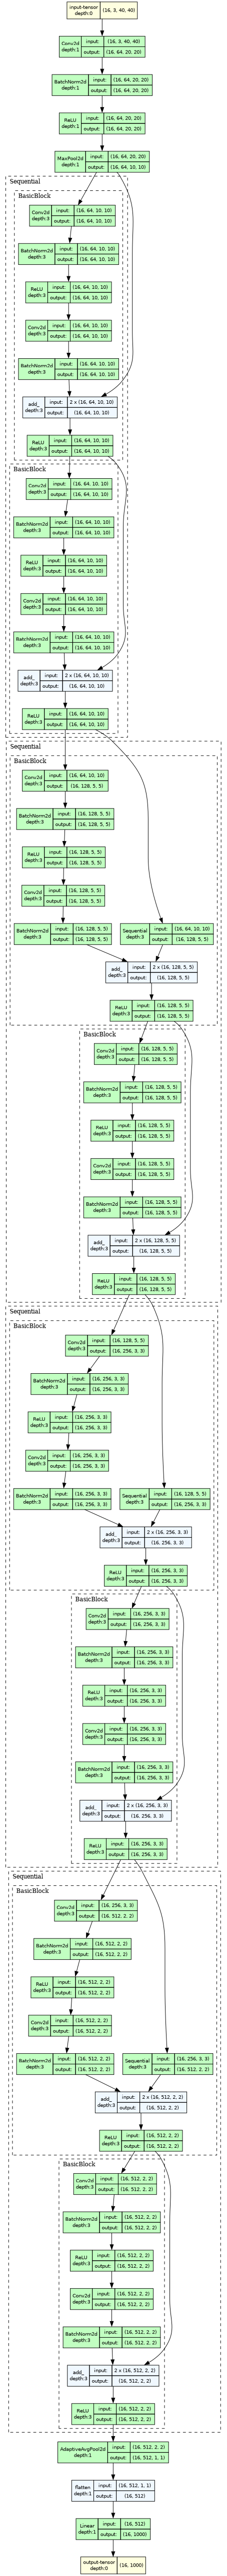

In [14]:
import torch
import graphviz
from torchview import draw_graph
from torchvision.models import resnet18, GoogLeNet, densenet, vit_b_16

# when running on VSCode run the below command
# svg format on vscode does not give desired result
graphviz.set_jupyter_format('png')

model = resnet18()
x = torch.randn(16, 3, 40, 40)
model_graph = draw_graph(
    model,
    input_data=x,
    device='meta',
    graph_name="resnet18",
    expand_nested=True)
# model_graph.resize_graph(scale=0.5) # 缩放
model_graph.visual_graph

# [tensorboardX](https://github.com/lanpa/tensorboardX)
- pip install tensorboardX
- [pytorch 网络可视化(四)：tensorboardX](https://blog.csdn.net/Wenyuanbo/article/details/118605418)


# [Netron](https://github.com/lutzroeder/Netron)
- pip install netron
- [pytorch 网络可视化(五): netron](https://blog.csdn.net/Wenyuanbo/article/details/118736258)
- [pytorch可视化工具netron](https://www.cnblogs.com/jiangnanyanyuchen/p/13344217.html)
- [PyTorch 神经网络模型可视化(Netron)](https://developer.aliyun.com/article/1300462)

# [TensorWatch](https://github.com/microsoft/tensorwatch) 废弃
- pip install tensorwatch
- [pytorch 网络可视化(三): Jupyter Notebook + tensorwatch](https://blog.csdn.net/Wenyuanbo/article/details/118579431)


# [PyTorchViz](https://github.com/szagoruyko/pytorchviz)
- apt-get install graphviz
- pip install torchviz

## [HiddenLayer](https://github.com/waleedka/hiddenlayer)
- conda install graphviz python-graphviz
- pip install hiddenlayer
- [pytorch 网络可视化(六): hiddenlayer](https://blog.csdn.net/Wenyuanbo/article/details/118765044)